In [2]:
import pandas as pd
import langid
from tqdm.auto import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## Langid

In [3]:
langid.set_languages(['uk', 'ru'])

In [4]:
uk_geo_light = pd.read_csv("../data/uk_geo_dataset_light.csv")
ru_geo_light = pd.read_csv("../data/ru_geo_dataset_light.csv")

In [5]:
uk_geo_light['lang'] = 'uk'
ru_geo_light['lang'] = 'ru'
geo_light = pd.concat([uk_geo_light, ru_geo_light]).reset_index(drop=True)

In [6]:
# geo_light['lang_pred'] = geo_light['text'].progress_apply(lambda x: langid.classify(x)[0])
geo_light['lang_pred'] = geo_light['text'].parallel_apply(lambda x: langid.classify(x)[0])

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

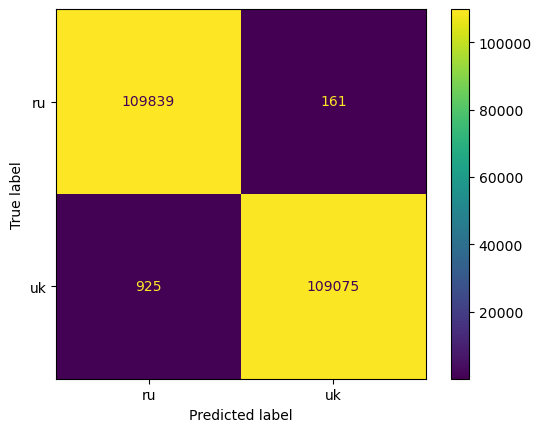

In [8]:
ConfusionMatrixDisplay.from_predictions(geo_light['lang'], geo_light['lang_pred'])

In [9]:
accuracy_score(geo_light['lang'], geo_light['lang_pred'])

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

0.9950636363636364

In [10]:
wrong = (geo_light[geo_light['lang'] != geo_light['lang_pred']]).copy()
wrong

,text,loc_markers,is_valid,lang,lang_pred
270,Кирило Шевченко перебуватиме у США упродовж 8-...,"[(31, 34)]",0,uk,ru
402,Серед найпоширеніших видів рослинного молока —...,[],0,uk,ru
560,Потім суддя отримає дзвінок із приблизно насту...,[],0,uk,ru
906,"«В основному люди просто не мають бажання, – г...",[],0,uk,ru
1021,У соборі Святого Павла зібралися 2650 гостей.,[],0,uk,ru
...,...,...,...,...,...
216299,Программу Каннского кинофестиваля в 2013 году ...,[],0,ru,uk
217677,Митинги 5 марта.,[],0,ru,uk
217778,"Мужчину, напавшего на пассажира лондонской под...",[],0,ru,uk
218673,Певица Кортни Лав завершила работу над своими ...,[],0,ru,uk


In [11]:
wrong['num_loc'] = wrong['text'].apply(len)

In [12]:
wrong.loc[560].text

'Потім суддя отримає дзвінок із приблизно наступним текстом: «добрый день, это вас из МГБ ДНР (варіанти: МВД ЛНР, ФСБ РФ) беспокоят.'

In [13]:
wrong.loc[270].text

'Кирило Шевченко перебуватиме у США упродовж 8-13 листопада.'

Приклад `402` цікавий, бо в ньому зрозуміти, що це українська, можна просто по входженню літер "є", "і". Це наводить на думку, що роспізнавання можна зробити трошки краще. Це може бути критичним, бо на тестовому сеті також є міскласифіковані семли, де по ідеї складнощей не мало б виникати

In [14]:
wrong.loc[402].text

'Серед найпоширеніших видів рослинного молока — соєве, рисове, мигдальне та кокосове.'

In [15]:
wrong[wrong['lang_pred'] == 'ru']

,text,loc_markers,is_valid,lang,lang_pred,num_loc
270,Кирило Шевченко перебуватиме у США упродовж 8-...,"[(31, 34)]",0,uk,ru,59
402,Серед найпоширеніших видів рослинного молока —...,[],0,uk,ru,84
560,Потім суддя отримає дзвінок із приблизно насту...,[],0,uk,ru,131
906,"«В основному люди просто не мають бажання, – г...",[],0,uk,ru,64
1021,У соборі Святого Павла зібралися 2650 гостей.,[],0,uk,ru,45
...,...,...,...,...,...,...
109512,"Але якщо мама каже ""ні"", то Аня робить ""так"".",[],1,uk,ru,45
109578,"Постійно якась хе - я: то пташиний грип, то ще...",[],1,uk,ru,54
109636,"Байдуже, головне – вона пила каву, пише “",[],1,uk,ru,41
109675,Тоді в Раду пройшли 64 особи за списками БПП.,[],1,uk,ru,45


In [16]:
wrong[wrong['lang_pred'] == 'ru']['text'].str.contains("і").sum()

567

## Modified langid

In [17]:
import re

In [18]:
def contains_uk_letters(input_string):
    ukrainian_letters = "їієґ`"
    ukrainian_letters_uppercase = ukrainian_letters.upper()
    pattern = re.compile(f"[{ukrainian_letters}{ukrainian_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [19]:
geo_light['lang_pred_mod'] = geo_light.apply(lambda row: 'uk' if contains_uk_letters(row['text']) else row['lang_pred'], axis=1)

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

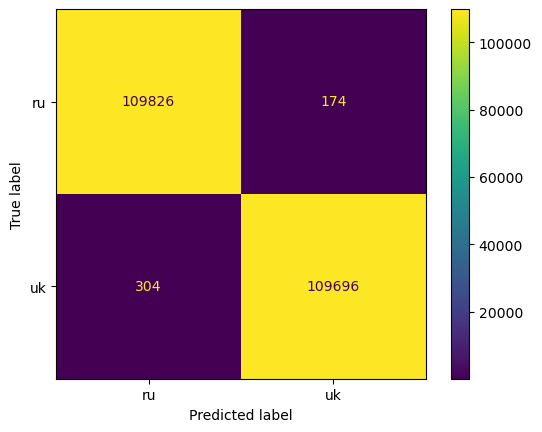

In [20]:
ConfusionMatrixDisplay.from_predictions(geo_light['lang'], geo_light['lang_pred_mod'])

In [21]:
wrong = (geo_light[geo_light['lang'] != geo_light['lang_pred_mod']]).copy()
wrong

,text,loc_markers,is_valid,lang,lang_pred,lang_pred_mod
270,Кирило Шевченко перебуватиме у США упродовж 8-...,"[(31, 34)]",0,uk,ru,ru
906,"«В основному люди просто не мають бажання, – г...",[],0,uk,ru,ru
1313,"Все, що зверх того, – додатки, “бонуси”.",[],0,uk,ru,ru
2627,"Але було це давно, коли хлопець ще був маленьк...",[],0,uk,ru,ru
3227,"“Можливо, я буду покараний”, – сказав пан Крищ...",[],0,uk,ru,ru
...,...,...,...,...,...,...
216299,Программу Каннского кинофестиваля в 2013 году ...,[],0,ru,uk,uk
217677,Митинги 5 марта.,[],0,ru,uk,uk
217778,"Мужчину, напавшего на пассажира лондонской под...",[],0,ru,uk,uk
218673,Певица Кортни Лав завершила работу над своими ...,[],0,ru,uk,uk


In [22]:
wrong.loc[3227].text

'“Можливо, я буду покараний”, – сказав пан Крищенко.'

In [23]:
wrong.sample(20, random_state=42)

,text,loc_markers,is_valid,lang,lang_pred,lang_pred_mod
212758,Нижняя палата парламента Таджикистана приняла ...,"[(25, 37)]",0,ru,uk,uk
15448,"Я трохи засмутилася, але тут на мене чекав сюр...",[],0,uk,ru,ru
53472,Ще такого не бачив на кыльцях обтягнули стрычк...,[],0,uk,ru,ru
30799,Про це пише американське видання The Washingto...,[],0,uk,ru,ru
31911,"Очевидно, що то була лише спроба блефувати.",[],0,uk,ru,ru
46311,Принцеса Шарлота та принц Джордж перед школою ...,[],0,uk,ru,ru
100530,"Те саме з морквою, яблуками, квашеною капустою.",[],1,uk,ru,ru
68955,"Я не встигаю за цим пухнастим"", - написала ""хо...",[],0,uk,ru,ru
94854,"У мене перед очима картинка Тимошенко-Ющенко, ...",[],0,uk,ru,ru
5449,"Хоча це й прикро, але таким не вбити мене.",[],0,uk,ru,ru


In [24]:
for i, text in enumerate(wrong.sample(20, random_state=42).text):
    print(i, text)

0 Нижняя палата парламента Таджикистана приняла законопроект об амнистии.
1 Я трохи засмутилася, але тут на мене чекав сюрприз!
2 Ще такого не бачив на кыльцях обтягнули стрычкоми замысть того аби залатати.
3 Про це пише американське видання The Washington Post.
4 Очевидно, що то була лише спроба блефувати.
5 Принцеса Шарлота та принц Джордж перед школою - фото - Гламур - TCH.
6 Те саме з морквою, яблуками, квашеною капустою.
7 Я не встигаю за цим пухнастим", - написала "холостячка".
8 У мене перед очима картинка Тимошенко-Ющенко, Ющенко-Тимошенко.
9 Хоча це й прикро, але таким не вбити мене.
10 Universal Home Entertainment намерена переиздать на DVD знаменитую кинотрилогию Роберта Земекиса ″Назад в будущее″.
11 На западе Казахстана микроавтобус "Опель" столкнулся с верблюдом.
12 "Уперше Марш слави УПА ми провели 2005 року.
13 Митинги 5 марта.
14 Саме там апостолам з'явився воскреслий Христос.
15 В Москве женщина на розовом Jaguar задавила мужчину на пешеходном переходе.
16 А тому той,

## Lang detection on test

In [25]:
df_test = pd.read_csv("../data/nlp-ua-locations-extractions/test.csv")

In [26]:
df_test['lang_pred'] = df_test['text'].progress_apply(lambda x: langid.classify(x)[0])

  0%|          | 0/477 [00:00<?, ?it/s]

In [27]:
df_test['lang_pred_mod'] = df_test.apply(lambda row: 'uk' if contains_uk_letters(row['text']) else row['lang_pred'], axis=1)

In [28]:
df_test[df_test['lang_pred'] == 'ru']

,text_id,text,locations,lang_pred,lang_pred_mod
6,6,👀\n\nМожемо БПЛА прислати 😀\n\nПсков бомбить Б...,[],ru,ru
15,15,Ще летить,[],ru,ru
27,27,👂Хотим тестить экофлоу и старлинк.,[],ru,ru
29,29,👂На Дмитровской по старой схеме ликвидировали ...,[],ru,ru
31,31,Горит заброшенный полуразвалившийся дом\n\nСоо...,[],ru,ru
53,53,С 28 августа в Белоцерковской общине алкоголь ...,[],ru,ru
54,54,"В Лаврі обирають нового Папу, чи настоятеля?",[],ru,uk
57,57,Найдена собака <корге> забежала в маршрутку на...,[],ru,ru
84,84,Так подготовили укрытие к 1 сентября в Национа...,[],ru,ru
94,94,"На днях наши бойцы из ЗРК ""Стингер"" сбили крыл...",[],ru,ru


## Lingua

In [60]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.UKRAINIAN, Language.RUSSIAN]
detector = LanguageDetectorBuilder.from_languages(*languages).build()

In [61]:
def contains_uk_letters(input_string):
    ukrainian_letters = "їієґ"
    ukrainian_letters_uppercase = ukrainian_letters.upper()
    pattern = re.compile(f"[{ukrainian_letters}{ukrainian_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [62]:
def contains_ru_letters(input_string):
    ru_letters = "ыъэё"
    ru_letters_uppercase = ru_letters.upper()
    pattern = re.compile(f"[{ru_letters}{ru_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [63]:
import re

def detect_lang(text):
    if contains_uk_letters(text):
        return 'uk'
    elif contains_ru_letters(text):
        return 'ru'
    else:
        return 'uk' if detector.detect_language_of(text) == Language.UKRAINIAN else 'ru'

In [52]:
geo_light["lang_pred_lingua"] = geo_light['text'].parallel_apply(detect_lang)

/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/evgeniy/.local/bin/miniconda3/envs/nlp-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

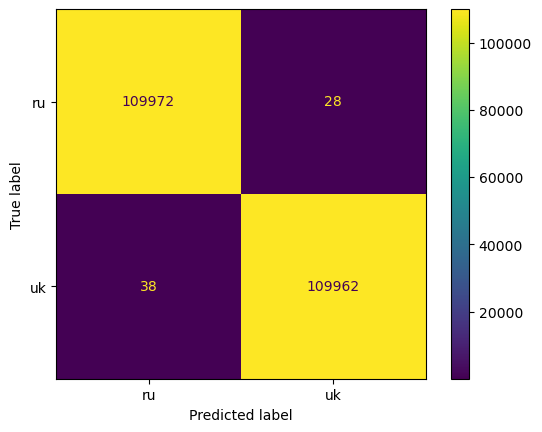

In [53]:
ConfusionMatrixDisplay.from_predictions(geo_light['lang'], geo_light['lang_pred_lingua'])

In [54]:
wrong = geo_light.loc[geo_light['lang'] != geo_light['lang_pred_lingua']]

In [55]:
wrong[['text', 'lang', 'lang_pred_lingua']]

,text,lang,lang_pred_lingua
5875,"Головне вчасно все поставити, щоб спеклось.",uk,ru
7648,Фото автора та з сайту Лайонела де Ланжа (ПАР).,uk,ru
15914,"Головне, не продавайся великим продюсерам з Мо...",uk,ru
18570,Подкаст шеф-редактора журналу XXL Дмитра Максю...,uk,ru
18637,"Не те, щоб наривались, але точно не бояться.",uk,ru
...,...,...,...
181053,"CD-ROM ""Владимир Путин.",ru,uk
187232,Ведущая программы новостей «Свідок» украинског...,ru,uk
195715,Итальянский бренд обуви и аксессуаров Santoni ...,ru,uk
197857,Президент США Дональд Трамп «противоречит сам ...,ru,uk


In [64]:
df_test['lang_pred_lingua_mod'] = df_test['text'].parallel_apply(detect_lang)

In [65]:
df_test[['text', 'lang_pred_mod', 'lang_pred_lingua_mod']].to_csv("lang_pred_review.csv", index=None)

In [66]:
df_test.loc[df_test['lang_pred_mod'] != df_test['lang_pred_lingua_mod']]

,text_id,text,locations,lang_pred,lang_pred_mod,lang_pred_lingua_mod
6,6,👀\n\nМожемо БПЛА прислати 😀\n\nПсков бомбить Б...,[],ru,ru,uk
190,190,"«Першотравень» на пл. Калiнiна (Майдан), 1970-тi",[],ru,ru,uk
274,274,"БРЯНСЬК, НЕ СПАТИ! 😀",[],ru,ru,uk
450,450,Орловська область 👀,[],ru,ru,uk


## Gcld3

In [ ]:
def contains_uk_letters(input_string):
    ukrainian_letters = "їієґ"
    ukrainian_letters_uppercase = ukrainian_letters.upper()
    pattern = re.compile(f"[{ukrainian_letters}{ukrainian_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [ ]:
def contains_ru_letters(input_string):
    ru_letters = "ыъэё"
    ru_letters_uppercase = ru_letters.upper()
    pattern = re.compile(f"[{ru_letters}{ru_letters_uppercase}]")
    return bool(pattern.search(input_string))

In [ ]:
import re

def detect_lang(text):
    if contains_uk_letters(text):
        return 'uk'
    elif contains_ru_letters(text):
        return 'ru'
    else:
        return 'uk' if detector.detect_language_of(text) == Language.UKRAINIAN else 'ru'